In [2]:
import seaborn as sns
from sklearn.datasets import make_blobs

In [3]:
X,y=make_blobs(
    n_samples=1000,
    n_features=2,
    centers=4,
    random_state=42
)

In [4]:
X

array([[-8.55503989,  7.06461794],
       [-6.13753182, -6.58081701],
       [-6.32130028, -6.8041042 ],
       ...,
       [ 3.69047995,  4.60555175],
       [-7.48913939, -7.0670809 ],
       [-9.40049578,  7.11430104]])

<Axes: >

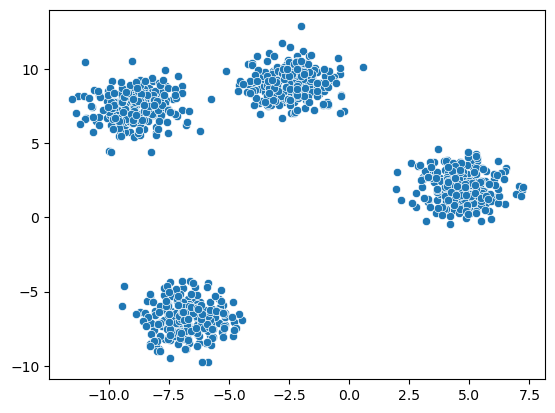

In [8]:
sns.scatterplot(x=X[:,0],y=X[:,1])

In [9]:
from sklearn.cluster import KMeans

In [10]:
K=4
kmeans=KMeans(
    n_clusters=K,
    random_state=42
)


In [11]:
labels=kmeans.fit_predict(X)

<Axes: >

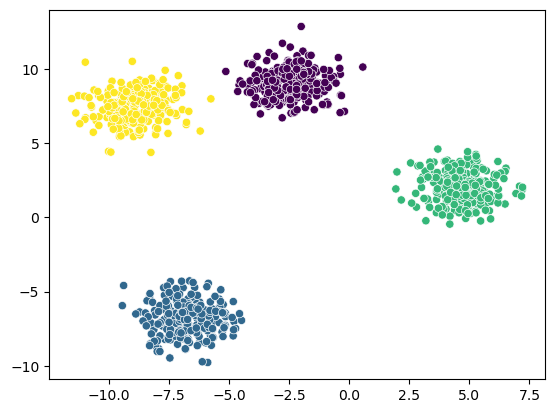

In [12]:
sns.scatterplot(x=X[:,0],y=X[:,1],c=labels)

# choosing k values:Elbow method

In [13]:
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

<Axes: >

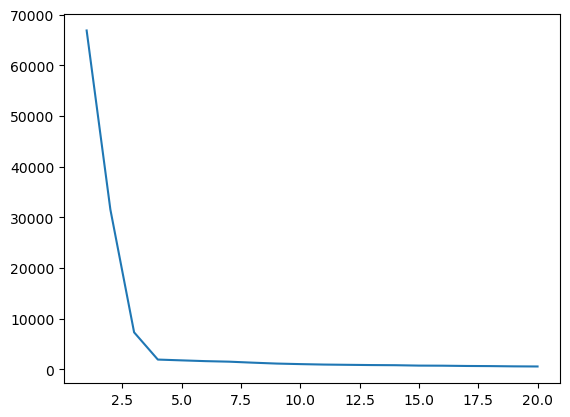

In [14]:
sns.lineplot(x=range(1, 21), y=wcss)


In [16]:
!pip install kneed

In [19]:
from kneed import KneeLocator

In [20]:
knee = KneeLocator(
    range(1, 21),
    wcss,
    curve="convex",
    direction="decreasing"
)


In [21]:
print("Optimal number of clusters:", knee.knee)

Optimal number of clusters: 4


# Silhoutte score

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
ss = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)

    ss.append(score)

<Axes: >

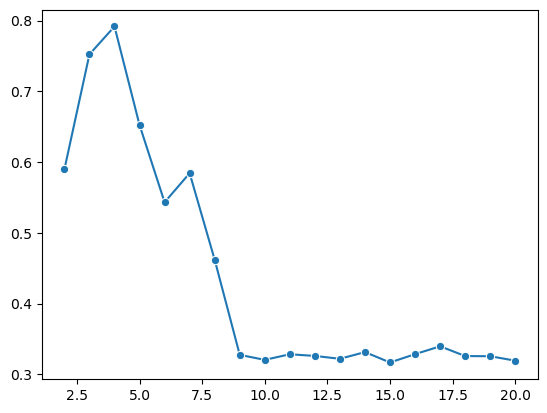

In [24]:

sns.lineplot(x=range(2, 21), y=ss, marker='o')